In [34]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

In [60]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [61]:
print('device:', device)

device: cpu


In [35]:
train_path = "data/cake-classification/images/train" 
test_path = "data/cake-classification/images/test"

In [36]:
tr = transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
train_dataset = datasets.ImageFolder(train_path, transform=tr)
test_dataset = datasets.ImageFolder(test_path, transform=tr)

batch_size = 16


trainloader = DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


In [37]:
print(train_dataset.classes)

['apple_pie', 'cannoli', 'carrot_cake', 'chocolate_cake', 'chocolate_mousse', 'churros', 'creme_brulee', 'cup_cakes', 'donuts', 'ice_cream', 'macarons', 'panna_cotta', 'red_velvet_cake', 'tiramisu', 'waffles']


In [38]:
print(train_dataset.class_to_idx)

{'apple_pie': 0, 'cannoli': 1, 'carrot_cake': 2, 'chocolate_cake': 3, 'chocolate_mousse': 4, 'churros': 5, 'creme_brulee': 6, 'cup_cakes': 7, 'donuts': 8, 'ice_cream': 9, 'macarons': 10, 'panna_cotta': 11, 'red_velvet_cake': 12, 'tiramisu': 13, 'waffles': 14}


In [39]:
classes = train_dataset.classes

In [40]:
print(f"Train dataset length: {len(train_dataset)}, Test dataset length: {len(test_dataset)}")


Train dataset length: 1500, Test dataset length: 300


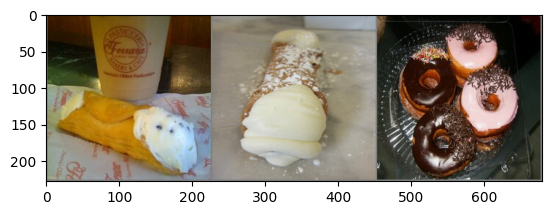

cannoli cannoli donuts


In [41]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images[:3]))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(3)))

In [42]:
print(images[0].shape)

torch.Size([3, 224, 224])


In [43]:
import torch.nn as nn
import torch.nn.functional as F

In [45]:
model = nn.Sequential(
    # 3 input image channels, 96 output channels, 7x7 convolution
    # the dimensions will be (3, 224, 224) -> (96, 55, 55)
    # calculation is floor((224 - 7 - 2*0 ) / 4) + 1 = 55
    nn.Conv2d(in_channels=3, out_channels=96, kernel_size=7, stride=4),
    nn.ReLU(),
    # the dimensions will be (96, 55, 55) -> (192, 28, 28)
    # calculation is floor((55 - 3 - 2*1 ) / 2) + 1 = 28
    nn.Conv2d(in_channels=96, out_channels=192, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    # the dimensions will be (192, 28, 28) -> (384, 14, 14)
    nn.Conv2d(in_channels=192, out_channels=384, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    nn.Flatten(),
    nn.Linear(384 * 1 * 1, 120),
    nn.ReLU(),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, 15)
)



In [ ]:
model.to(device)

In [46]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [47]:
x, y  = next(iter(trainloader))
print(x.shape)

torch.Size([16, 3, 224, 224])


In [48]:
for epoch in range(2):  # loop over the dataset multiple times
    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # move data to device
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 10 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 10:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    10] loss: 2.709
[1,    20] loss: 2.707
[1,    30] loss: 2.708
[1,    40] loss: 2.715
[1,    50] loss: 2.710
[1,    60] loss: 2.712
[1,    70] loss: 2.712
[1,    80] loss: 2.708
[1,    90] loss: 2.704
[2,    10] loss: 2.715
[2,    20] loss: 2.710
[2,    30] loss: 2.710
[2,    40] loss: 2.710
[2,    50] loss: 2.705
[2,    60] loss: 2.706
[2,    70] loss: 2.708
[2,    80] loss: 2.710
[2,    90] loss: 2.712
Finished Training


In [53]:
PATH = './model/cakes_net.pth'
torch.save(model.state_dict(), PATH)

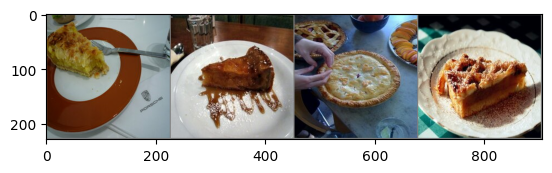

GroundTruth:  apple_pie apple_pie apple_pie apple_pie


In [54]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [55]:
# Load the saved model parameters
model.load_state_dict(torch.load(PATH))

# Set the model to evaluation mode
model.eval()


Sequential(
  (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(4, 4))
  (1): ReLU()
  (2): Conv2d(96, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU()
  (6): AdaptiveAvgPool2d(output_size=1)
  (7): Flatten(start_dim=1, end_dim=-1)
  (8): Linear(in_features=384, out_features=120, bias=True)
  (9): ReLU()
  (10): Linear(in_features=120, out_features=84, bias=True)
  (11): ReLU()
  (12): Linear(in_features=84, out_features=15, bias=True)
)

In [56]:
outputs = model(images)

In [57]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  churros churros churros churros


In [58]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 300 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 6 %


In [59]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
print(total_pred)

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

{'apple_pie': 0, 'cannoli': 0, 'carrot_cake': 0, 'chocolate_cake': 0, 'chocolate_mousse': 0, 'churros': 0, 'creme_brulee': 0, 'cup_cakes': 0, 'donuts': 0, 'ice_cream': 0, 'macarons': 0, 'panna_cotta': 0, 'red_velvet_cake': 0, 'tiramisu': 0, 'waffles': 0}
Accuracy for class: apple_pie is 0.0 %
Accuracy for class: cannoli is 0.0 %
Accuracy for class: carrot_cake is 0.0 %
Accuracy for class: chocolate_cake is 0.0 %
Accuracy for class: chocolate_mousse is 0.0 %
Accuracy for class: churros is 100.0 %
Accuracy for class: creme_brulee is 0.0 %
Accuracy for class: cup_cakes is 0.0 %
Accuracy for class: donuts is 0.0 %
Accuracy for class: ice_cream is 0.0 %
Accuracy for class: macarons is 0.0 %
Accuracy for class: panna_cotta is 0.0 %
Accuracy for class: red_velvet_cake is 0.0 %
Accuracy for class: tiramisu is 0.0 %
Accuracy for class: waffles is 0.0 %
